In [80]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.patches
from matplotlib.colors import LogNorm
from scipy import stats, fftpack
plt.style.use('classic')

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probability of observing 15 or more hurricane is: 0.05 per cent.
15 hurricanes is a number significantly different from the mean.


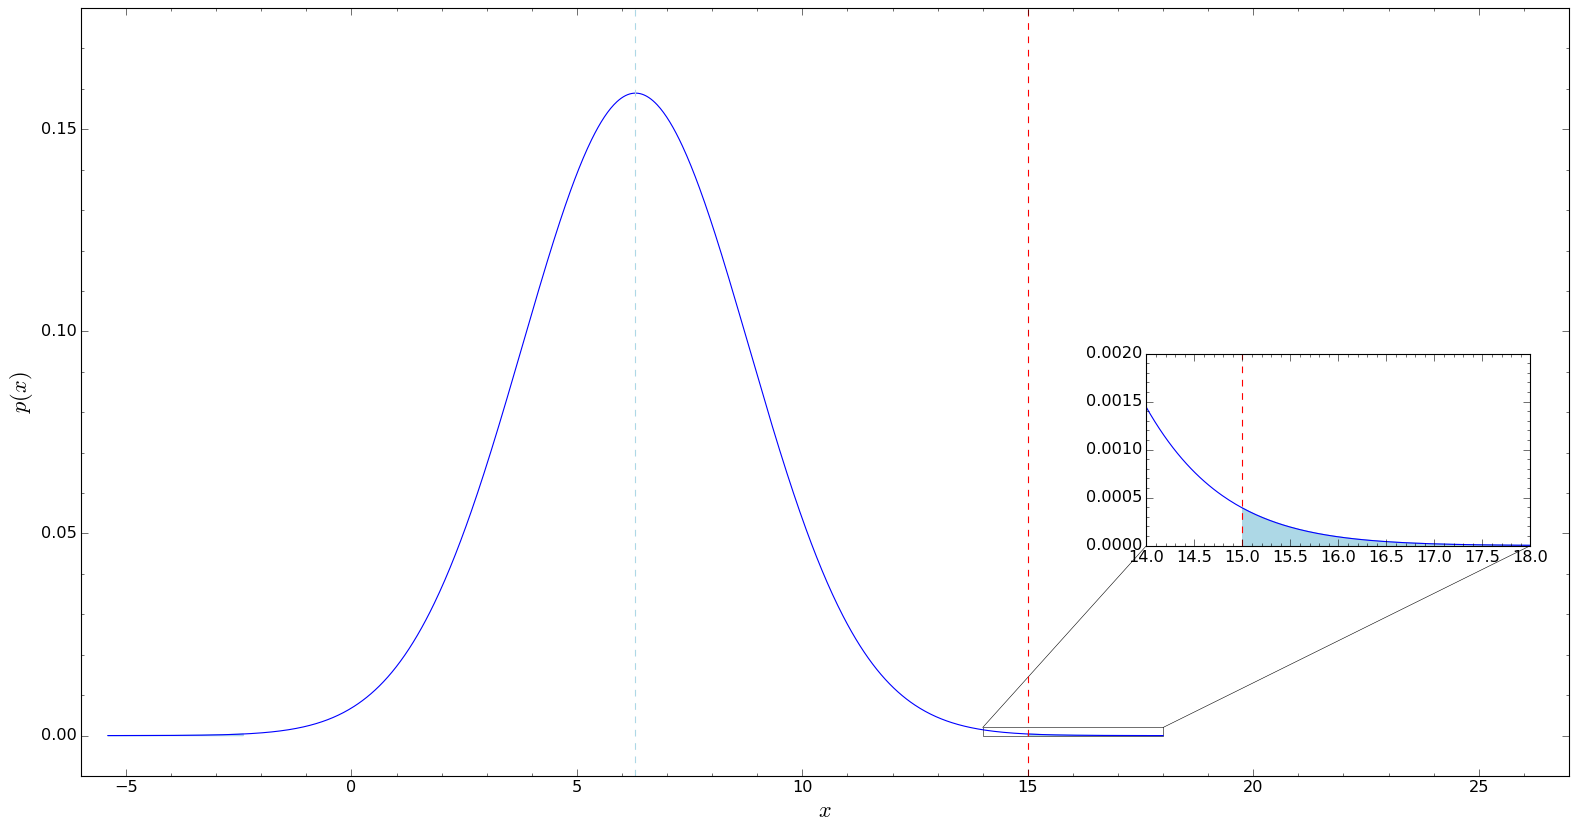

In [57]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.set_xlim(-6, 27)
ax.set_ylim(-0.01, 0.18)
ax.set_ylabel("$p(x)$", fontsize = 20)
ax.set_xlabel("$x$", fontsize = 20)

ax_zoom = fig.add_axes([0.68, 0.34, 0.2, 0.2])
ax_zoom.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax_zoom.minorticks_on()
ax_zoom.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax_zoom.tick_params(axis = 'both', labelsize = 14.5)

con1 = matplotlib.patches.ConnectionPatch(xyA = (14, 0.0020), xyB = (14, 0), coordsA ='data', axesA = ax, axesB = ax_zoom, color = 'black', linewidth = 0.5)
con2 = matplotlib.patches.ConnectionPatch(xyA = (18, 0.0020), xyB = (18, 0), coordsA ='data', axesA = ax, axesB = ax_zoom, color = 'black', linewidth = 0.5)
rect = matplotlib.patches.Rectangle((14, 0), 4, 0.0020, linewidth = 0.5, color = 'black', fill = False)

ax.add_patch(con1)
ax.add_patch(con2)
ax.add_patch(rect)

ax_zoom.set_xlim(14, 18)
ax_zoom.set_ylim(0, 0.002)


# ================================ #


mu = 6.3
sigma = np.sqrt(6.3) # defined sigma for a poisson distribution
x0 = 15

Z = (x0-mu)/sigma
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("The probability of observing 15 or more hurricane is: %2.2f per cent." % (pvalue*100))
if (Z >= 3):
    print("%i hurricanes is a number significantly different from the mean." % x0)
else:
    print("%i hurricanes is a number not significantly different from the mean." % x0)

w = x0 - mu
x = np.linspace(mu - w - 3, mu + w + 3, 1000)
y = stats.norm.pdf(x, loc = mu, scale = sigma)

ax.plot(x, y)
ax.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
ax.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
ax.axvline(x0, linestyle='--', color='red')
ax.axvline(mu, linestyle='--', color='lightblue')

ax_zoom.plot(x, y)
ax_zoom.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
ax_zoom.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
ax_zoom.axvline(x0, linestyle='--', color='red')
ax_zoom.axvline(mu, linestyle='--', color='lightblue')


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

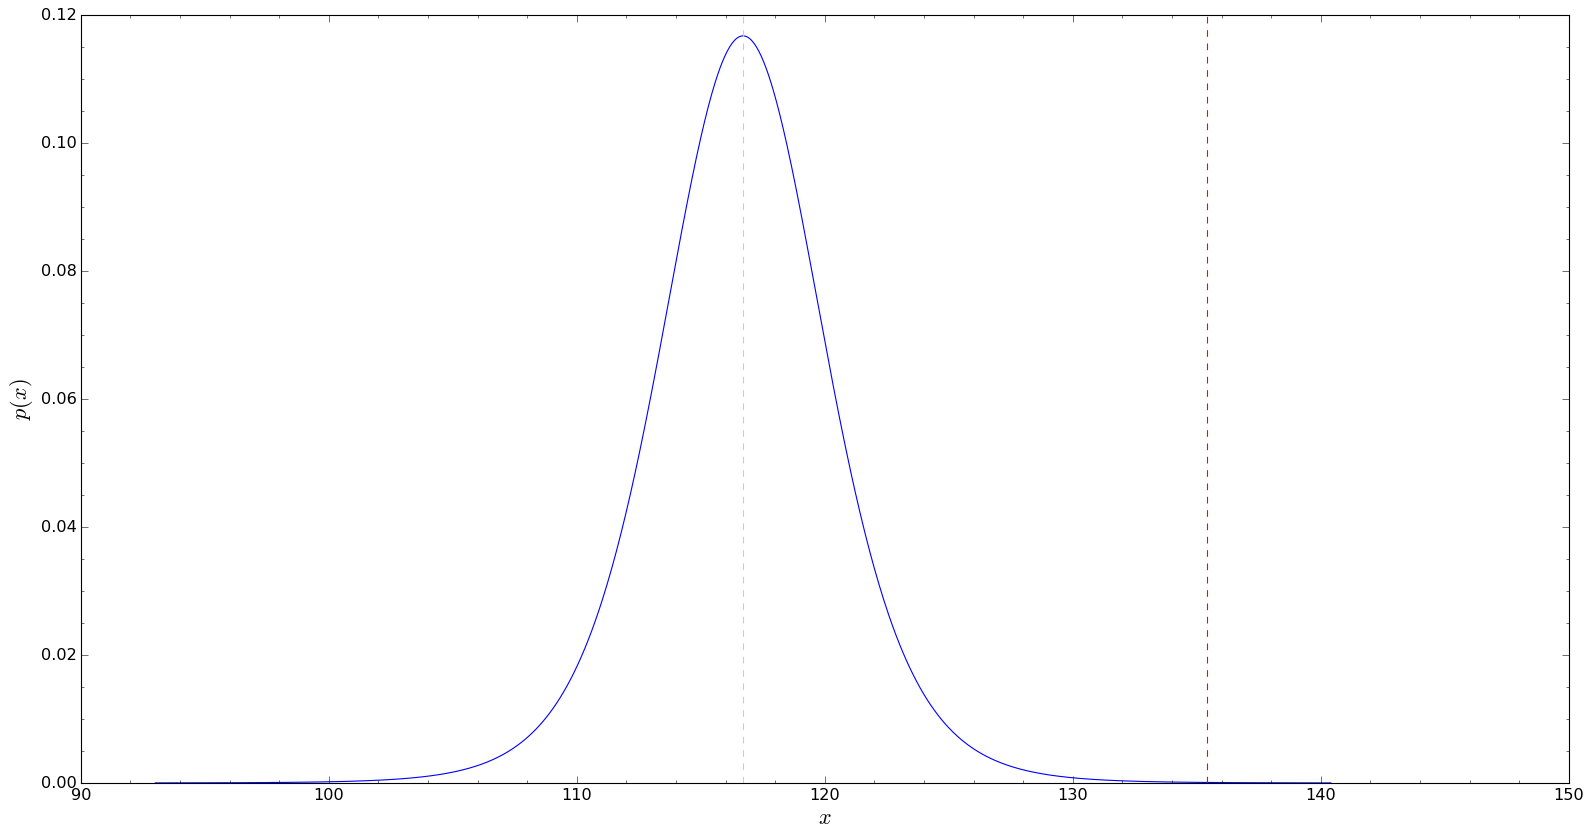

In [60]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.set_ylabel("$p(x)$", fontsize = 20)
ax.set_xlabel("$x$", fontsize = 20)

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
mean_pre = np.mean(pre)
mean_post = np.mean(post)
n = len(pre)
sigma_pre = np.std(pre)
sigma_post = np.std(post)

sigma = np.sqrt((sigma_pre**2 + sigma_post**2) / 2)
T = (mean_pre - mean_post) / (sigma * np.sqrt(2 / n))

w = np.abs(mean_pre - mean_post)
x = np.linspace(mean_pre - w - 5, mean_pre + w + 5, 1000)
y = stats.t.pdf(x, loc = mean_pre, scale = sigma / np.sqrt(len(pre)), df=len(pre) - 2)
ax.plot(x, y)
ax.axvline(mean_post, linestyle='--', color='red')
ax.axvline(mean_pre, linestyle='--', color='lightblue')


The probability of observing such post-exposure blood pressure measurements is: 0.40 per cent.


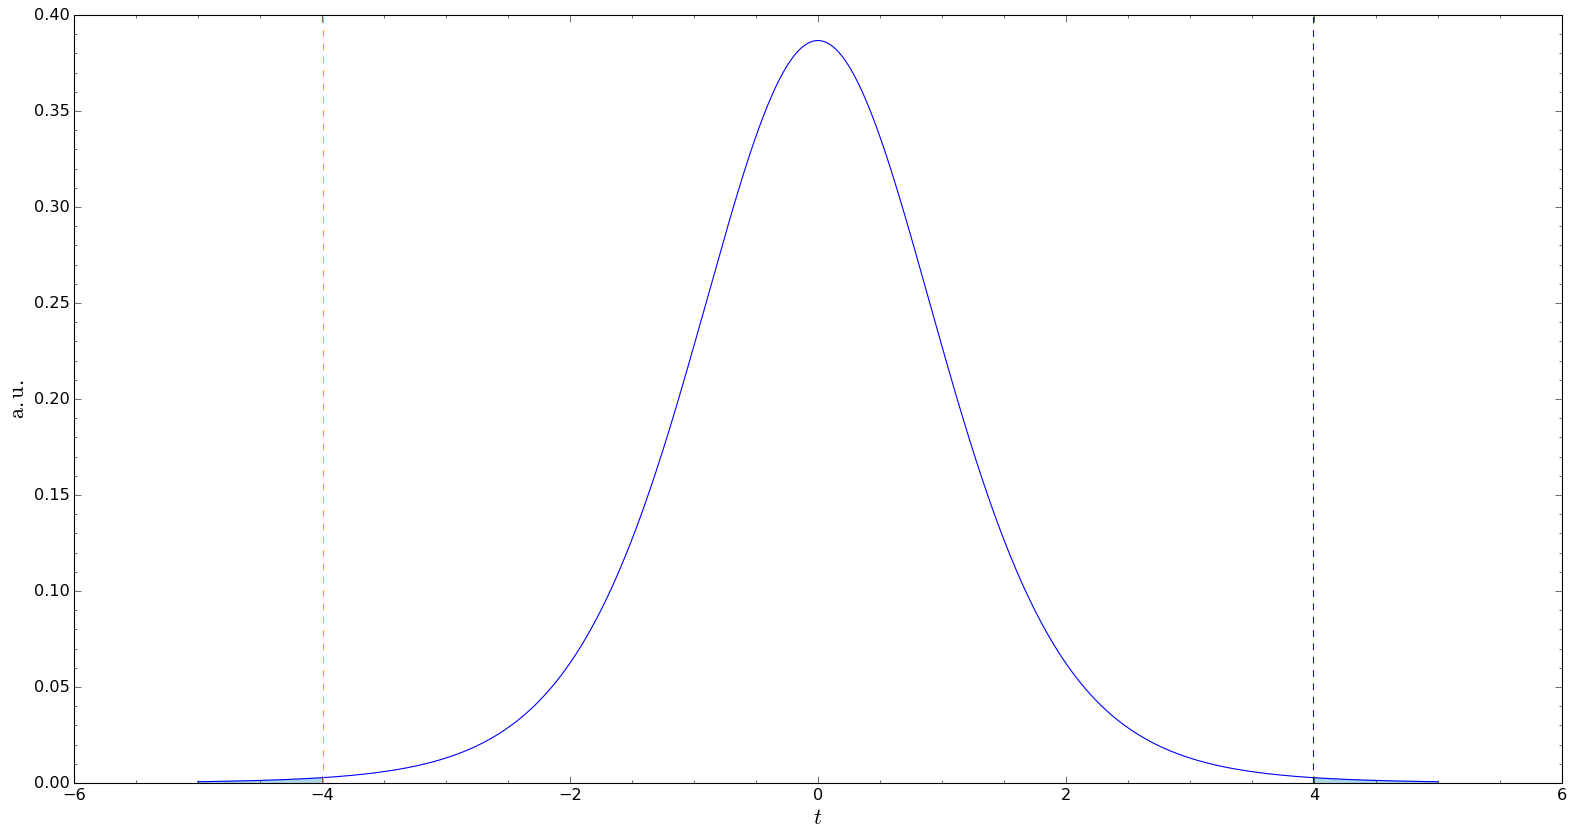

In [63]:
# plot the test statistics and its pdf
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.set_ylabel("${\\rm a.u.}$", fontsize = 20)
ax.set_xlabel("$t$", fontsize = 20)

xs = np.linspace(-5, 5, 1000)
ts = stats.t.pdf(xs, len(pre) - 2)
ax.plot(xs, ts)
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
ax.axvline(T, linestyle='--', color='orange')
ax.axvline(-T, linestyle='--', color='blue')


# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, len(pre) - 2) + (1. - stats.t.cdf(-T, len(pre) - 2))
print("The probability of observing such post-exposure blood pressure measurements is: %2.2f per cent." % (pvalue*100))

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

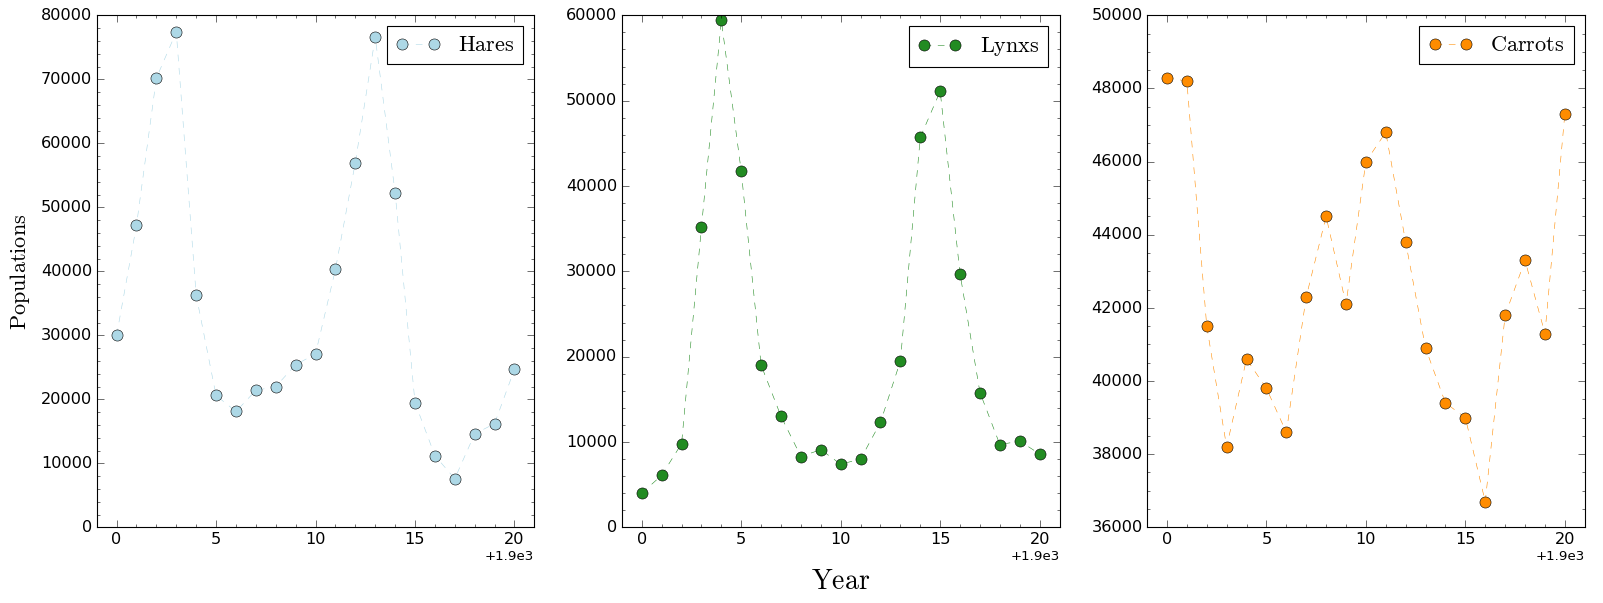

In [388]:
data = np.loadtxt("data/populations.txt")
year = data[:, 0]
hares = data[:, 1]
lynxs = data[:, 2]
carrots = data[:, 3]

fig, ax = plt.subplots(1, 3); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 8]
## share axes ##
bigax = fig.add_subplot(111, frameon=False)
bigax.spines['top'].set_color('none')
bigax.spines['bottom'].set_color('none')
bigax.spines['left'].set_color('none')
bigax.spines['right'].set_color('none')
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bigax.set_ylabel("${\\rm Populations}$", labelpad = 35, fontsize = 20)
bigax.set_xlabel('${\\rm Year}$', labelpad = 20, fontsize = 25)

ax[0].plot(year, hares, marker = 'o', markersize = 10, color = "lightblue", lw = .5, linestyle = "dashed", label = "${\\rm Hares}$")
ax[1].plot(year, lynxs, marker = 'o', markersize = 10, color = "forestgreen", lw = .5, linestyle = "dashed", label = "${\\rm Lynxs}$")
ax[2].plot(year, carrots, marker = 'o', markersize = 10, color = "darkorange", lw = .5, linestyle = "dashed", label = "${\\rm Carrots}$")

for i in range(len(ax)):
    ax[i].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
    ax[i].minorticks_on()
    ax[i].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
    ax[i].tick_params(axis = 'both', labelsize = 14.5)
    ax[i].legend(loc = "best", fontsize = 20)
    ax[i].set_xlim(1899, 1921)

(-1000.0, 45000.0)

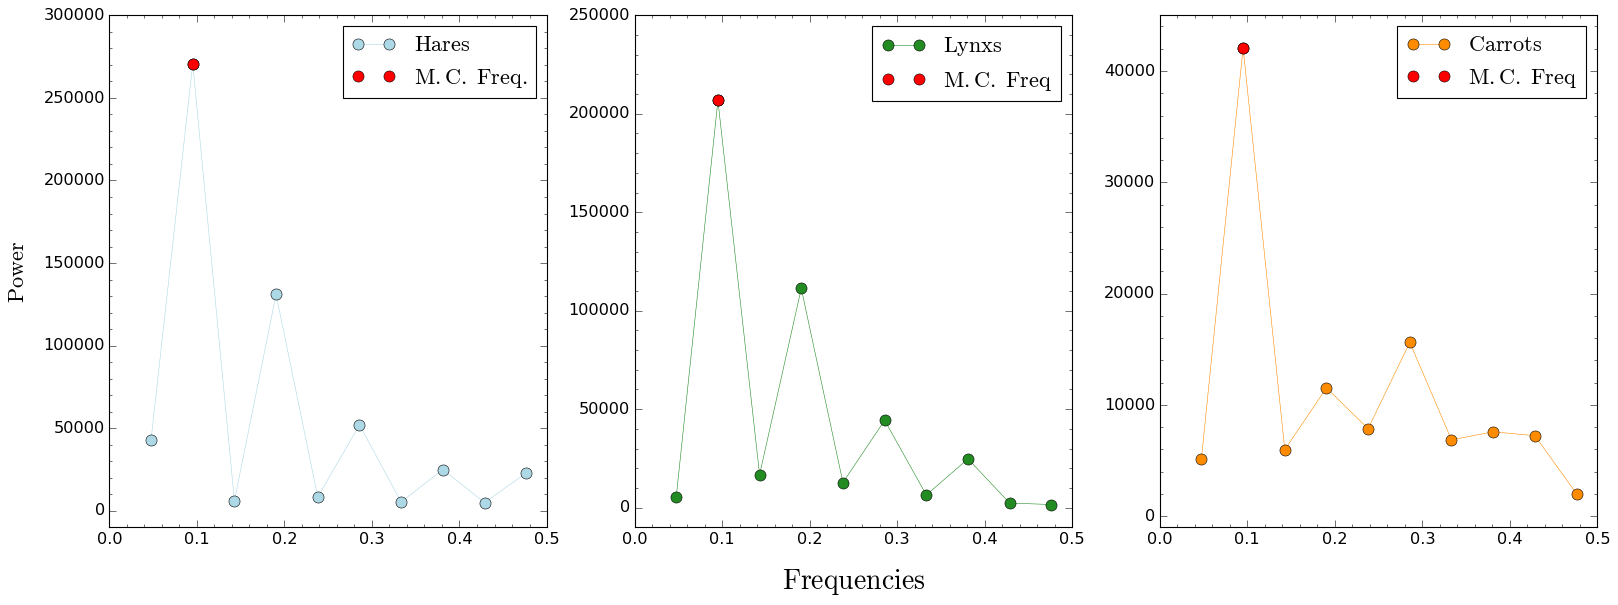

In [432]:
### PERFORMING THE FFT'S
time_step = 1 # year

hares_fft = fftpack.fft(hares) # fft of hares data
hares_freq = fftpack.fftfreq(len(hares), d = time_step) # get the array of corresponding corresponding frequencies
pos_mask_hares = np.where(hares_freq > 0) # get the positions of positive freq
hares_freqs = hares_freq[pos_mask_hares] # maintain only the positive frequencies
hares_ffts = hares_fft[pos_mask_hares] # maintain only the powers corresponding to positive frequencies (for a simpler visualization only)
hares_mainFreq = hares_freqs[np.abs(hares_ffts).argmax()] # find the frequency with the largest contribution

lynxs_fft = fftpack.fft(lynxs) # repeat for lynxs
lynxs_freq = fftpack.fftfreq(len(lynxs), d = time_step)
pos_mask_lynxs = np.where(lynxs_freq > 0)
lynxs_freqs = lynxs_freq[pos_mask_lynxs]
lynxs_ffts = lynxs_fft[pos_mask_lynxs] 
lynxs_mainFreq = lynxs_freqs[np.abs(lynxs_ffts).argmax()]

carrots_fft = fftpack.fft(carrots) # and for carrots
carrots_freq = fftpack.fftfreq(len(carrots), d = time_step)
pos_mask_carrots = np.where(carrots_freq > 0)
carrots_freqs = carrots_freq[pos_mask_carrots]
carrots_ffts = carrots_fft[pos_mask_carrots]
carrots_mainFreq = carrots_freqs[np.abs(carrots_ffts).argmax()]




# plotting the frequencies
fig, ax = plt.subplots(1, 3); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 8]
## share axes ##
bigax = fig.add_subplot(111, frameon=False)
bigax.spines['top'].set_color('none')
bigax.spines['bottom'].set_color('none')
bigax.spines['left'].set_color('none')
bigax.spines['right'].set_color('none')
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bigax.set_ylabel("${\\rm Power}$", labelpad = 50, fontsize = 20)
bigax.set_xlabel('${\\rm Frequencies}$', labelpad = 20, fontsize = 25)

ax[0].plot(hares_freqs, np.abs(hares_ffts), marker = 'o', markersize = 10, color = "lightblue", lw = .5, label = "${\\rm Hares}$")
ax[0].plot(hares_freqs[np.abs(hares_ffts).argmax()], np.max(np.abs(hares_ffts)), marker = "o", color = "red", lw = 0, markersize = 10, label = "${\\rm M.C.\ Freq.}$")
ax[1].plot(lynxs_freqs, np.abs(lynxs_ffts), marker = 'o', markersize = 10, color = "forestgreen", lw = .5, label = "${\\rm Lynxs}$")
ax[1].plot(lynxs_freqs[np.abs(lynxs_ffts).argmax()], np.max(np.abs(lynxs_ffts)), marker = "o", color = "red", lw = 0, markersize = 10, label = "${\\rm M.C.\ Freq}$")
ax[2].plot(carrots_freqs, np.abs(carrots_ffts), marker = 'o', markersize = 10, color = "darkorange", lw = .5, label = "${\\rm Carrots}$")
ax[2].plot(carrots_freqs[np.abs(carrots_ffts).argmax()], np.max(np.abs(carrots_ffts)), marker = "o", color = "red", lw = 0, markersize = 10, label = "${\\rm M.C.\ Freq}$")

for i in range(len(ax)):
    ax[i].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
    ax[i].minorticks_on()
    ax[i].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
    ax[i].tick_params(axis = 'both', labelsize = 14.5)
    ax[i].legend(loc = "best", fontsize = 20)
    ax[i].set_ylim(-10000)
ax[2].set_ylim(-1000)

The most contributing frequencies for hares, lynxs and carrots populations are, respectively: 0.095, 0.095, 0.095 year^-1
The period of population of these animals is of, respectively: 10.5, 10.5, 10.5 years


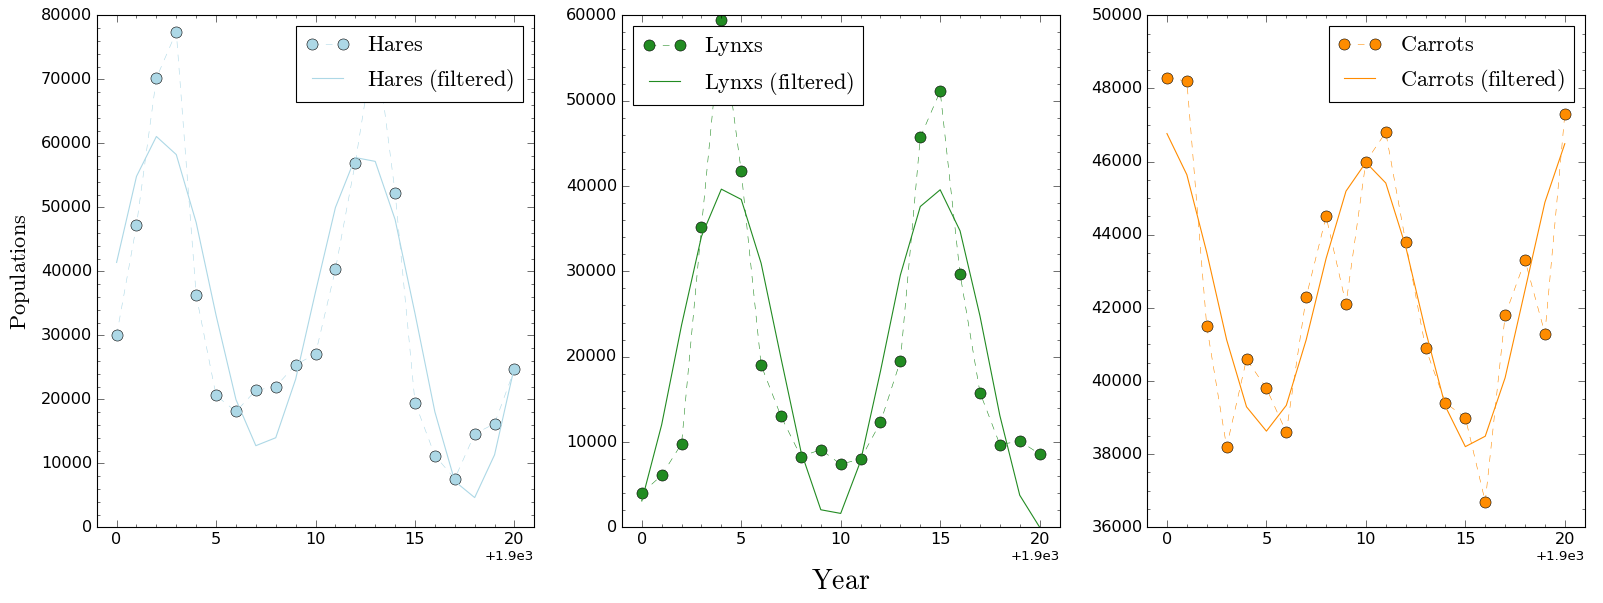

In [405]:
# filtering the frequencies setting them to zero if they are greater than the most contributing frequency
hares_fft[np.abs(hares_freq) > hares_mainFreq] = 0
lynxs_fft[np.abs(lynxs_freq) > lynxs_mainFreq] = 0
carrots_fft[np.abs(carrots_freq) > carrots_mainFreq] = 0

### PERFORMING THE IFFT'S and plotting
hares_filt = fftpack.ifft(hares_fft)
lynxs_filt = fftpack.ifft(lynxs_fft)
carrots_filt = fftpack.ifft(carrots_fft)



fig, ax = plt.subplots(1, 3); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 8]

## share axes ##
bigax = fig.add_subplot(111, frameon=False)
bigax.spines['top'].set_color('none')
bigax.spines['bottom'].set_color('none')
bigax.spines['left'].set_color('none')
bigax.spines['right'].set_color('none')
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bigax.set_ylabel("${\\rm Populations}$", labelpad = 35, fontsize = 20)
bigax.set_xlabel('${\\rm Year}$', labelpad = 20, fontsize = 25)

ax[0].plot(year, hares, marker = 'o', markersize = 10, color = "lightblue", lw = .5, linestyle = "dashed", label = "${\\rm Hares}$")
ax[1].plot(year, lynxs, marker = 'o', markersize = 10, color = "forestgreen", lw = .5, linestyle = "dashed", label = "${\\rm Lynxs}$")
ax[2].plot(year, carrots, marker = 'o', markersize = 10, color = "darkorange", lw = .5, linestyle = "dashed", label = "${\\rm Carrots}$")
ax[0].plot(year, np.abs(hares_filt), color = "lightblue", lw = 1., label = "${\\rm Hares\ (filtered)}$")
ax[1].plot(year, np.abs(lynxs_filt), color = "forestgreen", lw = 1., label = "${\\rm Lynxs\ (filtered)}$")
ax[2].plot(year, np.abs(carrots_filt), color = "darkorange", lw = 1., label = "${\\rm Carrots\ (filtered)}$")

for i in range(len(ax)):
    ax[i].tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
    ax[i].minorticks_on()
    ax[i].tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
    ax[i].tick_params(axis = 'both', labelsize = 14.5)
    ax[i].legend(loc = "best", fontsize = 20)
    ax[i].set_xlim(1899, 1921)

print("The most contributing frequencies for hares, lynxs and carrots populations are, respectively: %.3f, %.3f, %.3f year^-1" % (hares_mainFreq, lynxs_mainFreq, carrots_mainFreq))
print("The period of population of these animals is of, respectively: %.1f, %.1f, %.1f years" % (1 / hares_mainFreq, 1 / lynxs_mainFreq, 1 / carrots_mainFreq))

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Image unfiltered:


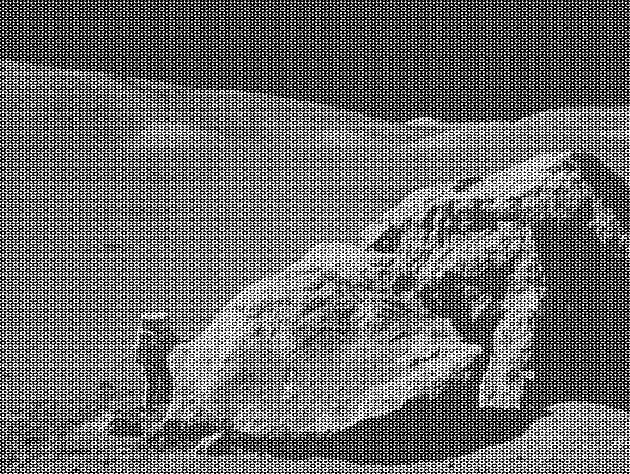

In [67]:
print("Image unfiltered:")
Image('moonlanding.png')

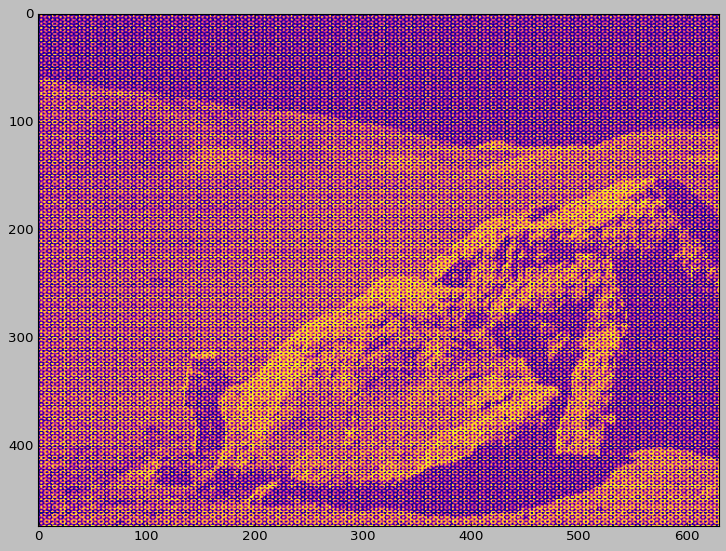

In [196]:
img = plt.imread("moonlanding.png")
plt.imshow(img, cmap = "plasma")

#### FFT

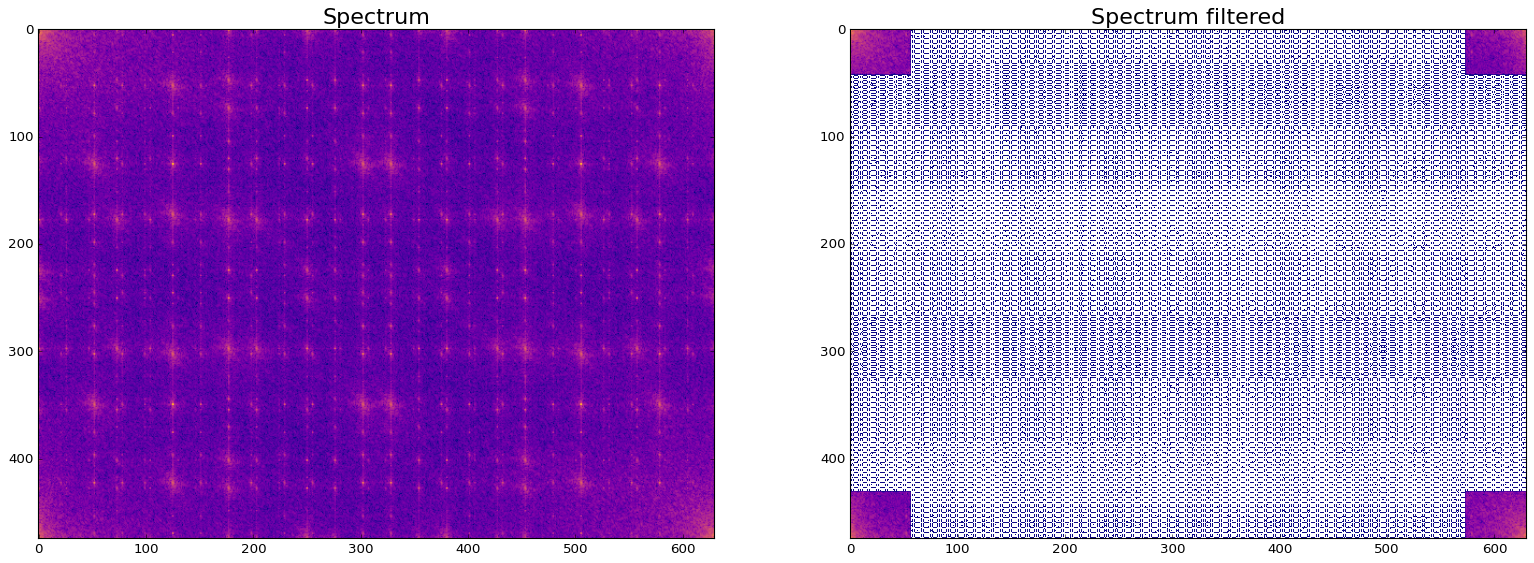

In [433]:
fig, ax = plt.subplots(1, 2); fig.patch.set_facecolor("xkcd:white")
plt.rcParams['figure.figsize'] = [24, 8]

img_fft = fftpack.fft2(img)
power = np.abs(img_fft)

ax[0].set_title("Spectrum", fontsize = 20)
ax[0].imshow(power, norm = LogNorm(vmin=5), cmap = "plasma")

th = 0.09 # we are only interested in the corners of the spectrum to eliminate high frequency noise


img_fft[int(th * np.shape(power)[0]) : int((1 - th) * np.shape(power)[0]), :] = 0 # cleaning
img_fft[:, int(th * np.shape(power)[1]) : int((1 - th)*np.shape(power)[1])] = 0
'''
img_fft[35:415, 10:20] = 0
img_fft[35:415, 50:60] = 0
img_fft[30:420, 70:80] = 0
img_fft[15:450, 100:110] = 0
img_fft[:, 120:130] = 0
img_fft[:, 140:150] = 0
img_fft[:, 170:180] = 0
img_fft[:, 200:210] = 0
img_fft[:, 220:230] = 0
img_fft[:, 250:260] = 0
img_fft[:, 270:280] = 0
img_fft[:, 295:305] = 0
img_fft[:, 320:330] = 0
img_fft[:, 350:360] = 0
img_fft[:, 375:385] = 0
img_fft[:, 395:405] = 0
img_fft[:, 425:435] = 0
img_fft[:, 445:455] = 0
img_fft[:, 445:455] = 0
img_fft[:, 475:485] = 0
img_fft[:, 500:510] = 0
img_fft[15:450, 520:530] = 0
img_fft[30:420, 555:565] = 0
img_fft[35:415, 570:580] = 0
img_fft[35:415, 600:610] = 0

img_fft[70:100, :] = 0
img_fft[120:130, :] = 0
img_fft[170:180, :] = 0
img_fft[220:230, :] = 0
img_fft[250:260, :] = 0
img_fft[295:305, :] = 0
img_fft[340:350, :] = 0
img_fft[400:430, :] = 0
'''

ax[1].set_title("Spectrum filtered", fontsize = 20)
ax[1].imshow(np.abs(img_fft), norm = LogNorm(vmin = 5), cmap = "plasma")


Filtered image:


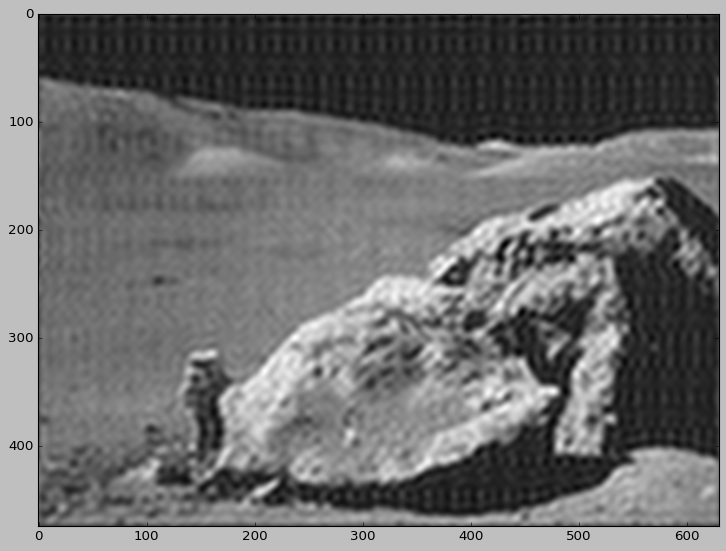

In [434]:
inv = fftpack.ifft2(img_fft)
print("Filtered image:")
plt.imshow(np.real(inv), cmap = "gray")